<code>plot_SIE_SIE_anom_STD_bias_init_month_vs_lead_time_FINAL.ipynb</code>.  Calculates bias ($ model - obs $) in standard deviation of SIE and SIE anom forecasts as a function of region, season, and lead time. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import os
import glob

1.  Load STD error files for each model
2.  Make following plots:
    *  <b>For each region</b>:
        *  <b>4-panel heat map of SIE std bias with lead weeks (x) and init month (y); each panel is one model</b>
        *  <b>4-panel heat map of SIE std anom bias with lead weeks (x) and init month (y); each panel is one model</b>


Load S2S model STDs and obs STDs as a function of region, valid month, and lead time (for models)

In [52]:
model_names_all = ['ecmwf','ukmo','ncep','metreofr']
model_names_plt = ['ecmwf','ukmo','ncep','meteofr']
seas_str = 'ALL'
week_length = 7
lead_week_max = 8
max_lead_week = lead_week_max
obs_name = 'NSIDC_0079'

In [53]:
file_path_load = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/data/'

SIE_errors_ALL = pd.DataFrame()
obs_ALL = pd.DataFrame()
for i_model in model_names_all:
    fload_i = file_path_load+'{i_model}/STD_err_{i_model}_months{seas_str}_model_clim_freq_WEEKLY.csv'.format(i_model=i_model,
                                                                                        seas_str=seas_str)
    pd_load = pd.read_csv(fload_i)
    pd_load['model name'] = i_model
    SIE_errors_ALL = SIE_errors_ALL.append(pd_load)
    # Obs
    load_obs = file_path_load+'{i_model}/STD_err_OBS{obs_name}_months{seas_str}_model_clim_freq_WEEKLY.csv'.format(i_model=i_model,
                                                                                    obs_name=obs_name,seas_str=seas_str)
    iobs_ALL = pd.read_csv(load_obs)
    iobs_ALL['model name'] = i_model
    obs_ALL = obs_ALL.append(iobs_ALL)
    

Load obs

Calculate lead time in weeks

In [54]:
SIE_errors_ALL['lead weeks'] = SIE_errors_ALL['lead days'].values.astype('timedelta64[D]')/pd.Timedelta(week_length,'D')
SIE_errors_ALL['lead weeks'] = SIE_errors_ALL['lead weeks'].apply(np.floor) 

Trim to errors of interest.  Then, create a <code>Categorical</code> so that we can plot our results in the desired order.  Finally, replace certain region names for plotting (and <code>meteofr</code> as well)

In [55]:
regions_trim = ["panArctic","Central Arctic","East Siberian-Beaufort-Chukchi Sea","Kara-Laptev Sea","Barents Sea",
              "East Greenland Sea"]
SIE_model_STD_trim = SIE_errors_ALL[SIE_errors_ALL['region'].isin(regions_trim)]
SIE_model_STD_trim['region'] = SIE_model_STD_trim['region'].replace({'East Greenland Sea':'E. Greenland Sea',
    'East Siberian-Beaufort-Chukchi Sea':'E. Sib./Beauf./Chuk. Sea'})
obs_trim = obs_ALL[obs_ALL['region'].isin(regions_trim)]
obs_trim['region'] = obs_trim['region'].replace({'East Greenland Sea':'E. Greenland Sea',
    'East Siberian-Beaufort-Chukchi Sea':'E. Sib./Beauf./Chuk. Sea'})
obs_trim['model name'] = obs_trim['model name'].replace({'metreofr':'meteofr'})
#
regions_sel = ["panArctic","Central Arctic","E. Sib./Beauf./Chuk. Sea","Kara-Laptev Sea","Barents Sea",
              "E. Greenland Sea"]
SIE_model_STD_trim['region sort'] = pd.Categorical(SIE_model_STD_trim['region'],regions_sel)
#
SIE_model_STD_trim['model name'] = SIE_model_STD_trim['model name'].replace({'metreofr':'meteofr'})
#
SIE_model_STD_trim = SIE_model_STD_trim.set_index(['region'])

/home/disk/sipn/mcmcgraw/anaconda3/envs/sea_ice_variability_S2S/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/disk/sipn/mcmcgraw/anaconda3/envs/sea_ice_variability_S2S/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/disk/sipn/mcmcgraw/anaconda3/envs/sea_ice_variability_S2S/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [56]:

SIE_model_lead_trim = SIE_model_STD_trim.where(SIE_model_STD_trim['lead weeks'] < lead_week_max ).dropna(how='all')

In [57]:
obs_reg = obs_trim.set_index(['region'])

Plot!

Text(0.5, 0.98, 'Bias in $\\sigma_{SIE}$, Lead Weeks 1-8')

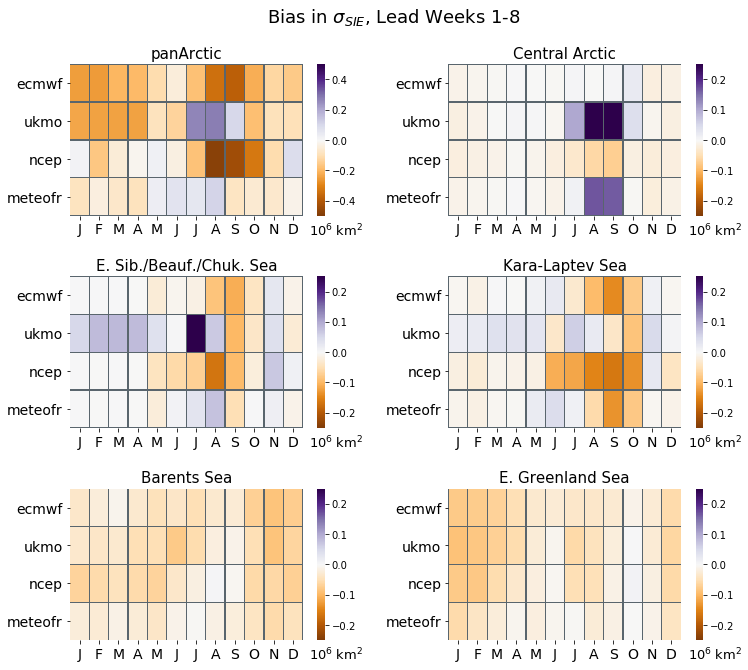

In [58]:
no_rows = 3
no_cols = 2
mon_labels = ['J','F','M','A','M','J','J','A','S','O','N','D']
fig1,ax = plt.subplots(no_rows,no_cols,figsize=(12,10))#,sharex=True,sharey=True)
for imod in np.arange(0,len(regions_sel)):
    #imod = 0
    region_sel = regions_sel[imod]
    plt_test = SIE_model_lead_trim.loc[region_sel]
    #
    obs_imod = obs_reg.loc[region_sel]
    #
    model_piv = pd.pivot_table(data=plt_test,index='model name',columns='valid date',values='SIE',aggfunc=np.mean)
    obs_piv = pd.pivot_table(data=obs_imod,index='model name',columns='valid date',values='SIE',aggfunc=np.mean)
    piv_plt = model_piv - obs_piv
    #
    ax_sel = ax.flat[imod]
    #cbar_ax = fig.add_axes([.965,.3,.03,.4])
    if region_sel == 'panArctic':
        [vmin,vmax] = [-0.5,0.5]
    else:
        [vmin,vmax] = [-0.25,0.25]
    sns.heatmap(piv_plt,cmap = 'PuOr',ax=ax_sel,linewidth=0.2,linecolor='xkcd:slate grey',
                vmin=vmin,vmax=vmax,center=0)
    ax_sel.set_yticklabels(model_names_plt,rotation=0,fontsize=14)
    ax_sel.set_xticklabels(mon_labels,fontsize=14,rotation=0)
    ax_sel.set_ylabel(None)
    ax_sel.set_xlabel(None)
    ax_sel.set_title('{region}'.format(region=region_sel),fontsize=15)
    ax_sel.collections[0].colorbar.set_label('10$^6$ km$^2$',rotation=0,fontsize=13,y=-0.04,labelpad=-20)

    #
fig1.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
fig1.suptitle(r'Bias in $\sigma_{{SIE}}$, Lead Weeks 1-{max_lead}'.format(SIE='SIE',max_lead=max_lead_week),fontsize=18)


In [59]:
fdir = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/figures/bias_S2S_minus_obs/'
if not os.path.exists(fdir):
    os.makedirs(fdir) 
fname_save = fdir+'SIE_SD_bias_common_reforecast_max_lead_{max_lead}weeks.png'.format(max_lead=max_lead_week)
fig1.savefig(fname_save,format='png',dpi=500,bbox_inches='tight')
##
fdir_final = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/figures/Paper_Figures/'
fname_final = fdir_final+'SD_bias_mean_SIE_max_lead_{max_lead}weeks.pdf'.format(max_lead=max_lead_week)

if max_lead_week == 4:
    fig1.savefig(fname_final,format='pdf',dpi=500,bbox_inches='tight')

And same for anomalous SIE

Text(0.5, 0.98, 'Bias in $\\sigma_{SIE Anom}$, Lead Weeks 1-8')

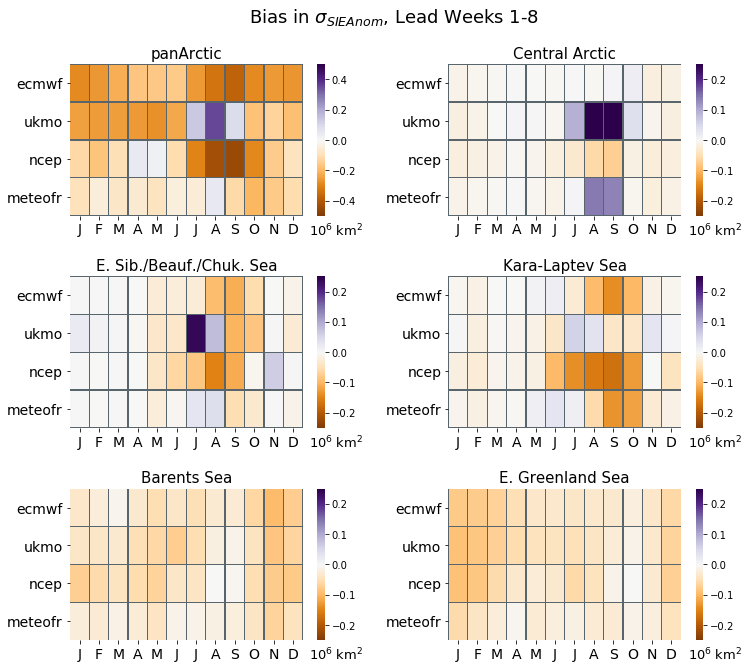

In [60]:
no_rows = 3
no_cols = 2
mon_labels = ['J','F','M','A','M','J','J','A','S','O','N','D']
fig2,ax = plt.subplots(no_rows,no_cols,figsize=(12,10))#,sharex=True,sharey=True)
for imod in np.arange(0,len(regions_sel)):
    #imod = 0
    region_sel = regions_sel[imod]
    plt_test = SIE_model_lead_trim.loc[region_sel]
    #
    obs_imod = obs_reg.loc[region_sel]
    #
    model_piv = pd.pivot_table(data=plt_test,index='model name',columns='valid date',values='SIE anom',aggfunc=np.mean)
    obs_piv = pd.pivot_table(data=obs_imod,index='model name',columns='valid date',values='SIE anom',aggfunc=np.mean)
    piv_plt = model_piv - obs_piv
    #
    ax_sel = ax.flat[imod]
    #cbar_ax = fig.add_axes([.965,.3,.03,.4])
    if region_sel == 'panArctic':
        [vmin,vmax] = [-0.5,0.5]
    else:
        [vmin,vmax] = [-0.25,0.25]
    sns.heatmap(piv_plt,cmap = 'PuOr',ax=ax_sel,linewidth=0.2,linecolor='xkcd:slate grey',
                vmin=vmin,vmax=vmax,center=0)
    ax_sel.set_yticklabels(model_names_plt,rotation=0,fontsize=14)
    ax_sel.set_xticklabels(mon_labels,fontsize=14,rotation=0)
    ax_sel.set_ylabel(None)
    ax_sel.set_xlabel(None)
    ax_sel.set_title('{region}'.format(region=region_sel),fontsize=15)
    ax_sel.collections[0].colorbar.set_label('10$^6$ km$^2$',rotation=0,fontsize=13,y=-0.04,labelpad=-20)

    #
fig2.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
fig2.suptitle(r'Bias in $\sigma_{{SIE Anom}}$, Lead Weeks 1-{max_lead}'.format(max_lead=max_lead_week),fontsize=18)


In [61]:
fname2_save = fdir+'SIE_anom_SD_bias_common_reforecast_max_lead_{max_lead}weeks.png'.format(max_lead=max_lead_week)
fig2.savefig(fname2_save,format='png',dpi=500,bbox_inches='tight')
#
fname2_final = fdir_final+'SD_bias_mean_SIE_anom_max_lead_{max_lead}weeks.pdf'.format(max_lead=max_lead_week)
if max_lead_week == 4:
    fig2.savefig(fname2_final,format='pdf',dpi=500,bbox_inches='tight')